# Predictive Modeling for Binary Diabetes Classification: A Comparative Analysis of K-Nearest Neighbors, Neural Networks, and Logistic Regression
## Introduction

This project aims to develop and evaluate predictive models for classifying a binary outcome, specifically to determine whether a patient has a certain condition based on diagnostic measurements. Using a dataset with features relevant to health indicators, such as blood glucose levels, BMI, and age, we build machine learning models to distinguish between positive and negative cases accurately.

I explore three different algorithms—K-Nearest Neighbors (KNN), Binary Neural Network Classifier, and Logistic Regression—each chosen for its unique approach to classification. K-Nearest Neighbors, a distance-based method, excels in capturing local patterns. The Binary Neural Network leverages deep learning techniques to capture complex relationships, while Logistic Regression provides a linear and interpretable baseline. Each model is evaluated using metrics such as accuracy, precision, recall, F1-score, and AUC score, providing a comprehensive view of their performance on both the training and test datasets.

By comparing these models, this project seeks to identify the most effective approach for this classification problem and to highlight the strengths and limitations of each method. Recommendations for future improvements are also discussed, with a focus on enhancing model accuracy, robustness, and generalization. This project ultimately provides a thorough examination of machine learning techniques in the field of binary classification within a medical context, contributing valuable insights for potential real-world applications in healthcare diagnostics.

## About the Dataset

 Link: [Diabetes](https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data])

### Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

### Content

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)


## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
sns.set()
plt.style.use('ggplot')
%matplotlib inline

from sklearn.preprocessing import scale, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, recall_score, classification_report, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.over_sampling import RandomOverSampler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Initial Steps in Model Development

To ensure accurate and reliable predictions, the model development process typically begins with data exploration and preparation. This involves handling missing values, analyzing feature distributions, and ensuring data consistency. Following this, we can apply feature engineering techniques to enhance prediction quality. Once the data is prepared, we can consider various algorithms, such as neural networks, to identify patterns that signify the likelihood of diabetes.

In [2]:
df=pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is not any missing values.

In [6]:
dup_values=df.duplicated().sum()

if dup_values==0:
    print(f"Duplicated values in df are: {dup_values}")
else:
    print("There are duplicated values. Please check the dataset.")

Duplicated values in df are: 0


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome'>

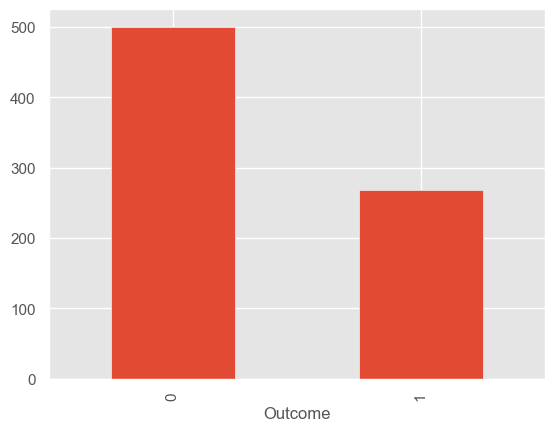

In [9]:
df['Outcome'].value_counts().plot(kind='bar')

In [10]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


This code uses a heatmap to visualize the correlation matrix of a DataFrame, which helps identify the strength and direction of relationships between variables.

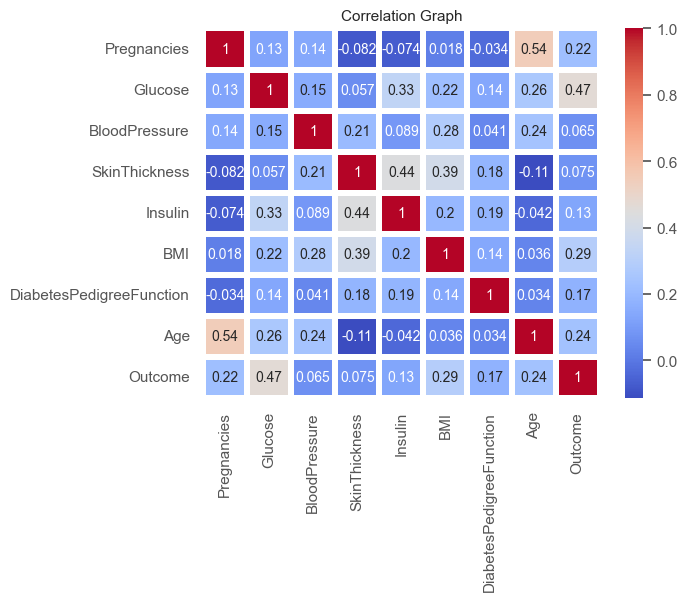

In [12]:
sns.heatmap(df.corr(), annot=True, fmt='0.2g', linewidths=4, cmap="coolwarm")
plt.title("Correlation Graph", fontsize=11)
plt.show()

This code replaces any zero values in certain columns of the DataFrame df with NaN (Not a Number), indicating missing data.

In [13]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [14]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,1


This code fills missing values in each column of the DataFrame `df` with the median values, calculated separately for each `Outcome` category. This approach ensures that missing data is filled based on the distribution within each outcome class (diabetes or no diabetes).

In [16]:
median_col={}

for col in df.columns:
    if col!='Outcome':
        median_col[col]=df.groupby('Outcome')[col].median()

for col in df.columns:
    if col!='Outcome':
        df.loc[(df['Outcome']==0)&(df[col].isnull()), col]=median_col[col][0]
        df.loc[(df['Outcome']==1)&(df[col].isnull()), col]=median_col[col][1]

In [17]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,27.0,102.5,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10.0,115.0,70.0,27.0,102.5,35.3,0.134,29,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8.0,125.0,96.0,32.0,169.5,34.3,0.232,54,1


In [18]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

This line of code calculates the mean glucose level for each category of the `Outcome` variable in the DataFrame `df`.

In [19]:
df.groupby('Outcome').agg({'Glucose':'mean'})

,Glucose
Outcome,
0,110.622000
1,142.302239


This line of code calculates the maximum glucose level for each group within the `Outcome` column in the DataFrame `df`.

In [20]:
df.groupby('Outcome').agg({'Glucose':'max'})

,Glucose
Outcome,
0,197.0
1,199.0


This line of code calculates the mean (average) BMI for each category in the `Outcome` column within the DataFrame `df`.

In [21]:
df.groupby('Outcome').agg({'BMI':'mean'})

,BMI
Outcome,
0,30.846000
1,35.398507


This line of code calculates the mean (average) number of pregnancies for each category in the `Outcome` column of the DataFrame `df`.

In [22]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.736000
1,5.574627


This code generates a cross-tabulation table that displays the frequency of each combination of `Pregnancies` and `Outcome` values in the DataFrame `df`.

__Output__

The result is a table where:

* Each row represents a different count of pregnancies.
* Each column represents the count of `Outcome` (0 or 1).
* Each cell shows the frequency (or number) of patients with a specific number of pregnancies who belong to each outcome group.

In [23]:
pd.crosstab(df.Pregnancies, df.Outcome)

Outcome,0,1
Pregnancies,,
1.0,106,29
2.0,84,19
3.0,121,27
4.0,45,23
5.0,36,59
6.0,34,16
7.0,20,25
8.0,16,22
9.0,10,18


This code generates a bar plot that visualizes the frequency of each combination of `Pregnancies` and `Outcome` values in the DataFrame `df`.

<Axes: xlabel='Pregnancies'>

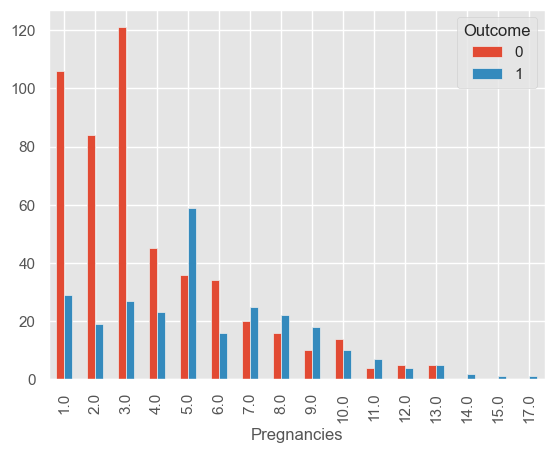

In [24]:
pd.crosstab(df.Pregnancies, df.Outcome).plot(kind='bar')

### Handling outliers

This code checks each feature in the DataFrame `df` to determine whether it contains any outliers based on the Interquartile Range (IQR) method. It then prints "Yes" if outliers are detected in a feature, or "No" if none are found.

In [25]:
for feature in df:
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    if df[(df[feature]>upper_bound)].any(axis=None):
        print(feature, "-> Yes")
    else:
        print(feature, "-> No")

Pregnancies -> Yes
Glucose -> No
BloodPressure -> Yes
SkinThickness -> Yes
Insulin -> Yes
BMI -> Yes
DiabetesPedigreeFunction -> Yes
Age -> Yes
Outcome -> No


This code identifies and caps outliers in the `Insulin` column of the DataFrame `df` using the Interquartile Range (IQR) method. Specifically, it sets any values above the upper outlier threshold to the threshold value itself.

This technique, known as "capping" or "winsorizing," reduces the influence of extreme values by setting them to the upper limit, without removing data points.

In [26]:
Q1=df.Insulin.quantile(0.25)
Q3=df.Insulin.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df.loc[df['Insulin']>upper, "Insulin"]=upper
df['Insulin'].head(10)

0    169.5
1    102.5
2    169.5
3     94.0
4    168.0
5    102.5
6     88.0
7    102.5
8    270.0
9    169.5
Name: Insulin, dtype: float64

### Handling categorical values
This code creates a categorical variable NewBMI, which represents BMI categories, using a pandas.Series object. The categories are specified in the form of labels that classify BMI ranges, which are common in medical and health contexts.

Each category name represents a BMI range:

+ _Underweight_: Typically, a BMI below 18.5.
+ _Normal_: Usually, a BMI between 18.5 and 24.9.
+ _Overweight_: Typically, a BMI between 25 and 29.9.
+ _Obesity 1_: Often a BMI between 30 and 34.9, classified as the first level of obesity.
+ _Obesity 2_: Usually represents a BMI between 35 and 39.9, the second level of obesity.
+ _Obesity 3_: Generally indicates a BMI of 40 or above, classified as severe obesity.

In [27]:
NewBMI=pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype='category')
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

This code classifies each patient into a BMI category based on established medical ranges for body weight. By doing so, it adds a descriptive, categorical feature to the dataset that can be useful for analysis, modeling, or visualization. For instance, this allows for examining health outcomes across different weight categories, making it easier to spot trends or correlations between BMI categories and diabetes (`Outcome`) in the dataset.

In [28]:
df['NewBMI']=NewBMI
df.loc[df['BMI']<=18.5, 'NewBMI']=NewBMI[0]
df.loc[(df['BMI']>18.5)&(df['BMI']<=24.9), 'NewBMI']=NewBMI[1]
df.loc[(df['BMI']>24.9)&(df['BMI']<=29.9), 'NewBMI']=NewBMI[2]
df.loc[(df['BMI']>29.9)&(df['BMI']<=34.9), 'NewBMI']=NewBMI[3]
df.loc[(df['BMI']>34.9)&(df['BMI']<=39.9), 'NewBMI']=NewBMI[4]
df.loc[df['BMI']>39.9, 'NewBMI']=NewBMI[5]

The `set_insuline` function provides a simple way to label each insulin measurement in a dataset as "Normal" or "Abnormal." When applied across rows in a DataFrame, it adds a categorical assessment of insulin levels that can be used in further analysis or modeling. This classification can help in identifying patterns and determining whether abnormal insulin levels are associated with diabetes or other health outcomes in the dataset.

In [29]:
def set_insuline(row):
    if row['Insulin']>=16 and row['Insulin']<=166:
        return "Normal"
    else:
        return "Abnormal"

The code creates a new column, `NewInsulinScore`, that classifies each row’s insulin level as either "Normal" or "Abnormal." 

In [30]:
df=df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal
5,5.0,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,Normal
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1,Obesity 1,Normal
7,10.0,115.0,70.0,27.0,102.5,35.3,0.134,29,0,Obesity 2,Normal
8,2.0,197.0,70.0,45.0,270.0,30.5,0.158,53,1,Obesity 1,Abnormal
9,8.0,125.0,96.0,32.0,169.5,34.3,0.232,54,1,Obesity 1,Abnormal


This code categorizes glucose levels in `df` into specific ranges, adding a new column called `NewGlucose` with descriptive labels. By classifying glucose values this way, the code makes it easier to interpret glucose levels in a meaningful, categorical form, which can aid in identifying patterns or trends within the dataset. Each category label describes a range that can be useful in analysis or model building.

In [31]:
NewGlucose=pd.Series(["Low", "Normal", "Overweight", "High"], dtype="category")

df['NewGlucose']=NewGlucose[0]
df.loc[df['Glucose']<=70, "NewGlucose"]=NewGlucose[0]
df.loc[(df['Glucose']>70)&(df['Glucose']<=99), "NewGlucose"]=NewGlucose[1]
df.loc[(df['Glucose']>99)&(df['Glucose']<=126), "NewGlucose"]=NewGlucose[2]
df.loc[df['Glucose']>126, "NewGlucose"]=NewGlucose[3]

In [32]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,High
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,High
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,High
5,5.0,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,Normal,Overweight
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1,Obesity 1,Normal,Normal
7,10.0,115.0,70.0,27.0,102.5,35.3,0.134,29,0,Obesity 2,Normal,Overweight
8,2.0,197.0,70.0,45.0,270.0,30.5,0.158,53,1,Obesity 1,Abnormal,High
9,8.0,125.0,96.0,32.0,169.5,34.3,0.232,54,1,Obesity 1,Abnormal,Overweight


This code converts the categorical columns `NewBMI`, `NewInsulinScore`, and `NewGlucose` in the DataFrame `df` into dummy (one-hot encoded) variables, a common preprocessing step for categorical data in machine learning models.<br><br>
The purpose of this section is to prepare categorical data for machine learning models, which typically require numerical input. By creating dummy variables, the code converts categories into a format that models can interpret.<br><br>
By setting `drop_first=False`, the code ensures that every category in `NewBMI`, `NewInsulinScore`, and `NewGlucose` is represented in the dummy variables, preserving all possible categories in the final DataFrame. This approach is useful if:
+ You need to analyze or interpret each category independently.
+ You want all categories available as features for a machine learning model, especially non-linear models that don’t require dummy variable reduction.

In [33]:
df=pd.get_dummies(df, columns=["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=False)

In [34]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Normal,...,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Abnormal,NewInsulinScore_Normal,NewGlucose_High,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,False,...,False,False,False,False,True,False,True,False,False,False
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,...,False,False,True,False,False,True,False,False,True,False
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,True,...,False,False,False,False,True,False,True,False,False,False
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,...,False,False,True,False,False,True,False,False,True,False
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,...,False,True,False,False,True,False,True,False,False,False
5,5.0,116.0,74.0,27.0,102.5,25.6,0.201,30,0,False,...,False,False,True,False,False,True,False,False,False,True
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1,False,...,False,False,False,False,False,True,False,False,True,False
7,10.0,115.0,70.0,27.0,102.5,35.3,0.134,29,0,False,...,True,False,False,False,False,True,False,False,False,True
8,2.0,197.0,70.0,45.0,270.0,30.5,0.158,53,1,False,...,False,False,False,False,True,False,True,False,False,False
9,8.0,125.0,96.0,32.0,169.5,34.3,0.232,54,1,False,...,False,False,False,False,True,False,False,False,False,True


This code creates `cat_df` as a streamlined DataFrame that focuses only on the categorical, one-hot encoded variables, without including any other columns from `df`. This can be useful for:

+ Analyzing or visualizing these specific categorical features.
+ Preparing a subset of features for machine learning models if only these categories are relevant.
+ Reducing the scope of analysis to only these specific categorical variables, making it easier to understand patterns within BMI, insulin score, and glucose categories.

By isolating these columns, `cat_df` provides a clean, focused dataset for any tasks centered around these categorical attributes.

In [35]:
cat_df=df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 
           'NewBMI_Overweight', 'NewBMI_Underweight', 'NewInsulinScore_Normal', 
           'NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 
           'NewGlucose_High']]

cat_df.head(10)

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_High
0,True,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,True,False,True,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True
5,False,False,False,True,False,True,False,False,True,False
6,True,False,False,False,False,True,False,True,False,False
7,False,True,False,False,False,True,False,False,True,False
8,True,False,False,False,False,False,False,False,False,True
9,True,False,False,False,False,False,False,False,True,False


This line of code converts all the columns in the DataFrame `cat_df` to the integer data type.<br><br>
This conversion is useful for:
+ Memory Efficiency: Integer types consume less memory than floats, which is beneficial when working with large datasets.
+ Consistency: Ensures all dummy variables are explicitly 0 or 1 as integers, which is typical for binary indicators and helps avoid unexpected type mismatches in further processing or modeling.
+ Compatibility: Some machine learning models and libraries expect binary or categorical data to be in integer form rather than float, so this step ensures compatibility.

In [36]:
cat_df=cat_df.astype(int)
cat_df.head(10)

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_High
0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1
5,0,0,0,1,0,1,0,0,1,0
6,1,0,0,0,0,1,0,1,0,0
7,0,1,0,0,0,1,0,0,1,0
8,1,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,0,0,0,1,0


In [37]:
cat_df.shape

(768, 10)

## Separating Features and Target Variable for Model Training
This code separates the DataFrame `df` into two parts: `y`, which contains the target variable (`Outcome`), and `X`, which contains the remaining features for model training, excluding both the target and specific dummy variables.<br><br>
__Purpose of the Code__

1. Preparing for Machine Learning:
    + In machine learning, it is essential to separate the features (`X`) from the target variable (`y`). This code prepares `X` and y for input into a model.

2. Feature Selection:
    + By removing specific dummy variables, this code focuses `X` on other features that might be more relevant or avoids multicollinearity if another set of encoding is used.

3. Flexibility for Model Training:
    + The resulting `X` DataFrame includes only the predictor variables, ensuring the model does not "see" the target variable (`Outcome`) during training, which could otherwise lead to data leakage.

In [39]:
y=df['Outcome']

X=df.drop(['Outcome','NewBMI_Obesity 1', 'NewBMI_Obesity 2', 
           'NewBMI_Obesity 3', 'NewBMI_Overweight', 'NewBMI_Underweight', 
           'NewInsulinScore_Normal', 'NewGlucose_Low', 'NewGlucose_Normal', 
           'NewGlucose_Overweight', 'NewGlucose_High'], axis=1)
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Normal,NewInsulinScore_Abnormal
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,False,True
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,False,False
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,True,True
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,False,False
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,False,True
5,5.0,116.0,74.0,27.0,102.5,25.6,0.201,30,False,False
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,False,False
7,10.0,115.0,70.0,27.0,102.5,35.3,0.134,29,False,False
8,2.0,197.0,70.0,45.0,270.0,30.5,0.158,53,False,True
9,8.0,125.0,96.0,32.0,169.5,34.3,0.232,54,False,True


This code scales the features in `X` using RobustScaler, which transforms the data to reduce the influence of outliers. The `cols` and `index` variables are set to retain the original column names and index of `X`, so these can be reapplied after scaling.<br><br>
By scaling the features with RobustScaler, the transformed data has reduced skewness from extreme values, which can improve model stability and performance, especially in algorithms sensitive to data scale, like distance-based models (e.g.,  k-nearest neighbors).

In [40]:
cols=X.columns
index=X.index

scaled=RobustScaler().fit_transform(X)
scaled

array([[ 0.75      ,  0.7654321 ,  0.        , ...,  1.23529412,
         0.        ,  1.        ],
       [-0.5       , -0.79012346, -0.375     , ...,  0.11764706,
         0.        ,  0.        ],
       [ 1.25      ,  1.62962963, -0.5       , ...,  0.17647059,
         1.        ,  1.        ],
       ...,
       [ 0.5       ,  0.09876543,  0.        , ...,  0.05882353,
         0.        ,  0.        ],
       [-0.5       ,  0.22222222, -0.75      , ...,  1.05882353,
         0.        ,  1.        ],
       [-0.5       , -0.59259259, -0.125     , ..., -0.35294118,
         0.        ,  0.        ]])

This line of code converts the `scaled` data array, scaled, back into a DataFrame format with the original column names and index from `X`, preserving the structure of the data before scaling.<br>
This ensures the data is easy to interpret and can be used seamlessly in further steps, such as model training or data analysis, without losing the context provided by the original DataFrame structure.

In [41]:
X=pd.DataFrame(scaled, columns=cols, index=index)
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Normal,NewInsulinScore_Abnormal
0,0.75,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294,0.0,1.0
1,-0.50,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647,0.0,0.0
2,1.25,1.629630,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471,1.0,1.0
3,-0.50,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588,0.0,0.0
4,0.50,0.493827,-2.000,1.000000,0.977612,1.214286,5.007843,0.235294,0.0,1.0
5,0.50,-0.024691,0.125,-0.142857,0.000000,-0.708791,-0.448366,0.058824,0.0,0.0
6,0.00,-0.962963,-1.375,0.571429,-0.216418,-0.115385,-0.325490,-0.176471,0.0,0.0
7,1.75,-0.049383,-0.125,-0.142857,0.000000,0.357143,-0.623529,0.000000,0.0,0.0
8,-0.25,1.975309,-0.125,2.428571,2.500000,-0.170330,-0.560784,1.411765,0.0,1.0
9,1.25,0.197531,1.500,0.571429,1.000000,0.247253,-0.367320,1.470588,0.0,1.0


This line of code concatenates the `X` DataFrame (containing scaled continuous features) with `cat_df` (containing categorical features as dummy variables) along the columns, combining both datasets into a single DataFrame for use in model training.

In [42]:
X=pd.concat([X, cat_df], axis=1)
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Normal,NewInsulinScore_Abnormal,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_High
0,0.75,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294,0.0,1.0,1,0,0,0,0,0,0,0,0,1
1,-0.50,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647,0.0,0.0,0,0,0,1,0,1,0,1,0,0
2,1.25,1.629630,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471,1.0,1.0,0,0,0,0,0,0,0,0,0,1
3,-0.50,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588,0.0,0.0,0,0,0,1,0,1,0,1,0,0
4,0.50,0.493827,-2.000,1.000000,0.977612,1.214286,5.007843,0.235294,0.0,1.0,0,0,1,0,0,0,0,0,0,1
5,0.50,-0.024691,0.125,-0.142857,0.000000,-0.708791,-0.448366,0.058824,0.0,0.0,0,0,0,1,0,1,0,0,1,0
6,0.00,-0.962963,-1.375,0.571429,-0.216418,-0.115385,-0.325490,-0.176471,0.0,0.0,1,0,0,0,0,1,0,1,0,0
7,1.75,-0.049383,-0.125,-0.142857,0.000000,0.357143,-0.623529,0.000000,0.0,0.0,0,1,0,0,0,1,0,0,1,0
8,-0.25,1.975309,-0.125,2.428571,2.500000,-0.170330,-0.560784,1.411765,0.0,1.0,1,0,0,0,0,0,0,0,0,1
9,1.25,0.197531,1.500,0.571429,1.000000,0.247253,-0.367320,1.470588,0.0,1.0,1,0,0,0,0,0,0,0,1,0


In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   NewBMI_Normal             768 non-null    float64
 9   NewInsulinScore_Abnormal  768 non-null    float64
 10  NewBMI_Obesity 1          768 non-null    int32  
 11  NewBMI_Obesity 2          768 non-null    int32  
 12  NewBMI_Obesity 3          768 non-null    int32  
 13  NewBMI_Overweight         768 non-null    int32  
 14  NewBMI_Und

In [44]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Normal,NewInsulinScore_Abnormal,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_High
count,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.344401,0.115484,0.024333,0.155692,0.456507,4.226763e-02,0.259807,0.249464,0.132812,0.354167,0.305990,0.195312,0.127604,0.233073,0.005208,0.645833,0.014323,0.235677,0.372396,0.377604
std,0.752684,0.752201,0.756627,1.270117,0.867525,7.560987e-01,0.866219,0.691778,0.339593,0.478572,0.461126,0.396699,0.333866,0.423064,0.072028,0.478572,0.118896,0.424698,0.483758,0.485104
min,-0.500000,-1.802469,-3.000000,-3.000000,-1.320896,-1.521978e+00,-0.769935,-0.470588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.250000,-0.425926,-0.500000,-0.428571,0.000000,-5.000000e-01,-0.336601,-0.294118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,3.903128e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,0.574074,0.500000,0.571429,1.000000,5.000000e-01,0.663399,0.705882,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,3.500000,2.024691,3.125000,10.142857,2.500000,3.851648e+00,5.352941,3.058824,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This code uses Seaborn's `pairplot` to create a grid of scatter plots for each pair of features in the DataFrame `df`, colored by the `Outcome` column, which is typically a target variable for classification (e.g., diabetes presence). The plot provides insights into the relationships between features, separated by class.<br><br>
This `pairplot` provides a comprehensive view of the relationships between pairs of features, making it useful for identifying patterns or clusters within the data. The `hue` parameter allows for an easy comparison between the two `Outcome` classes, helping to visually assess which features might be more predictive or show separation between classes.

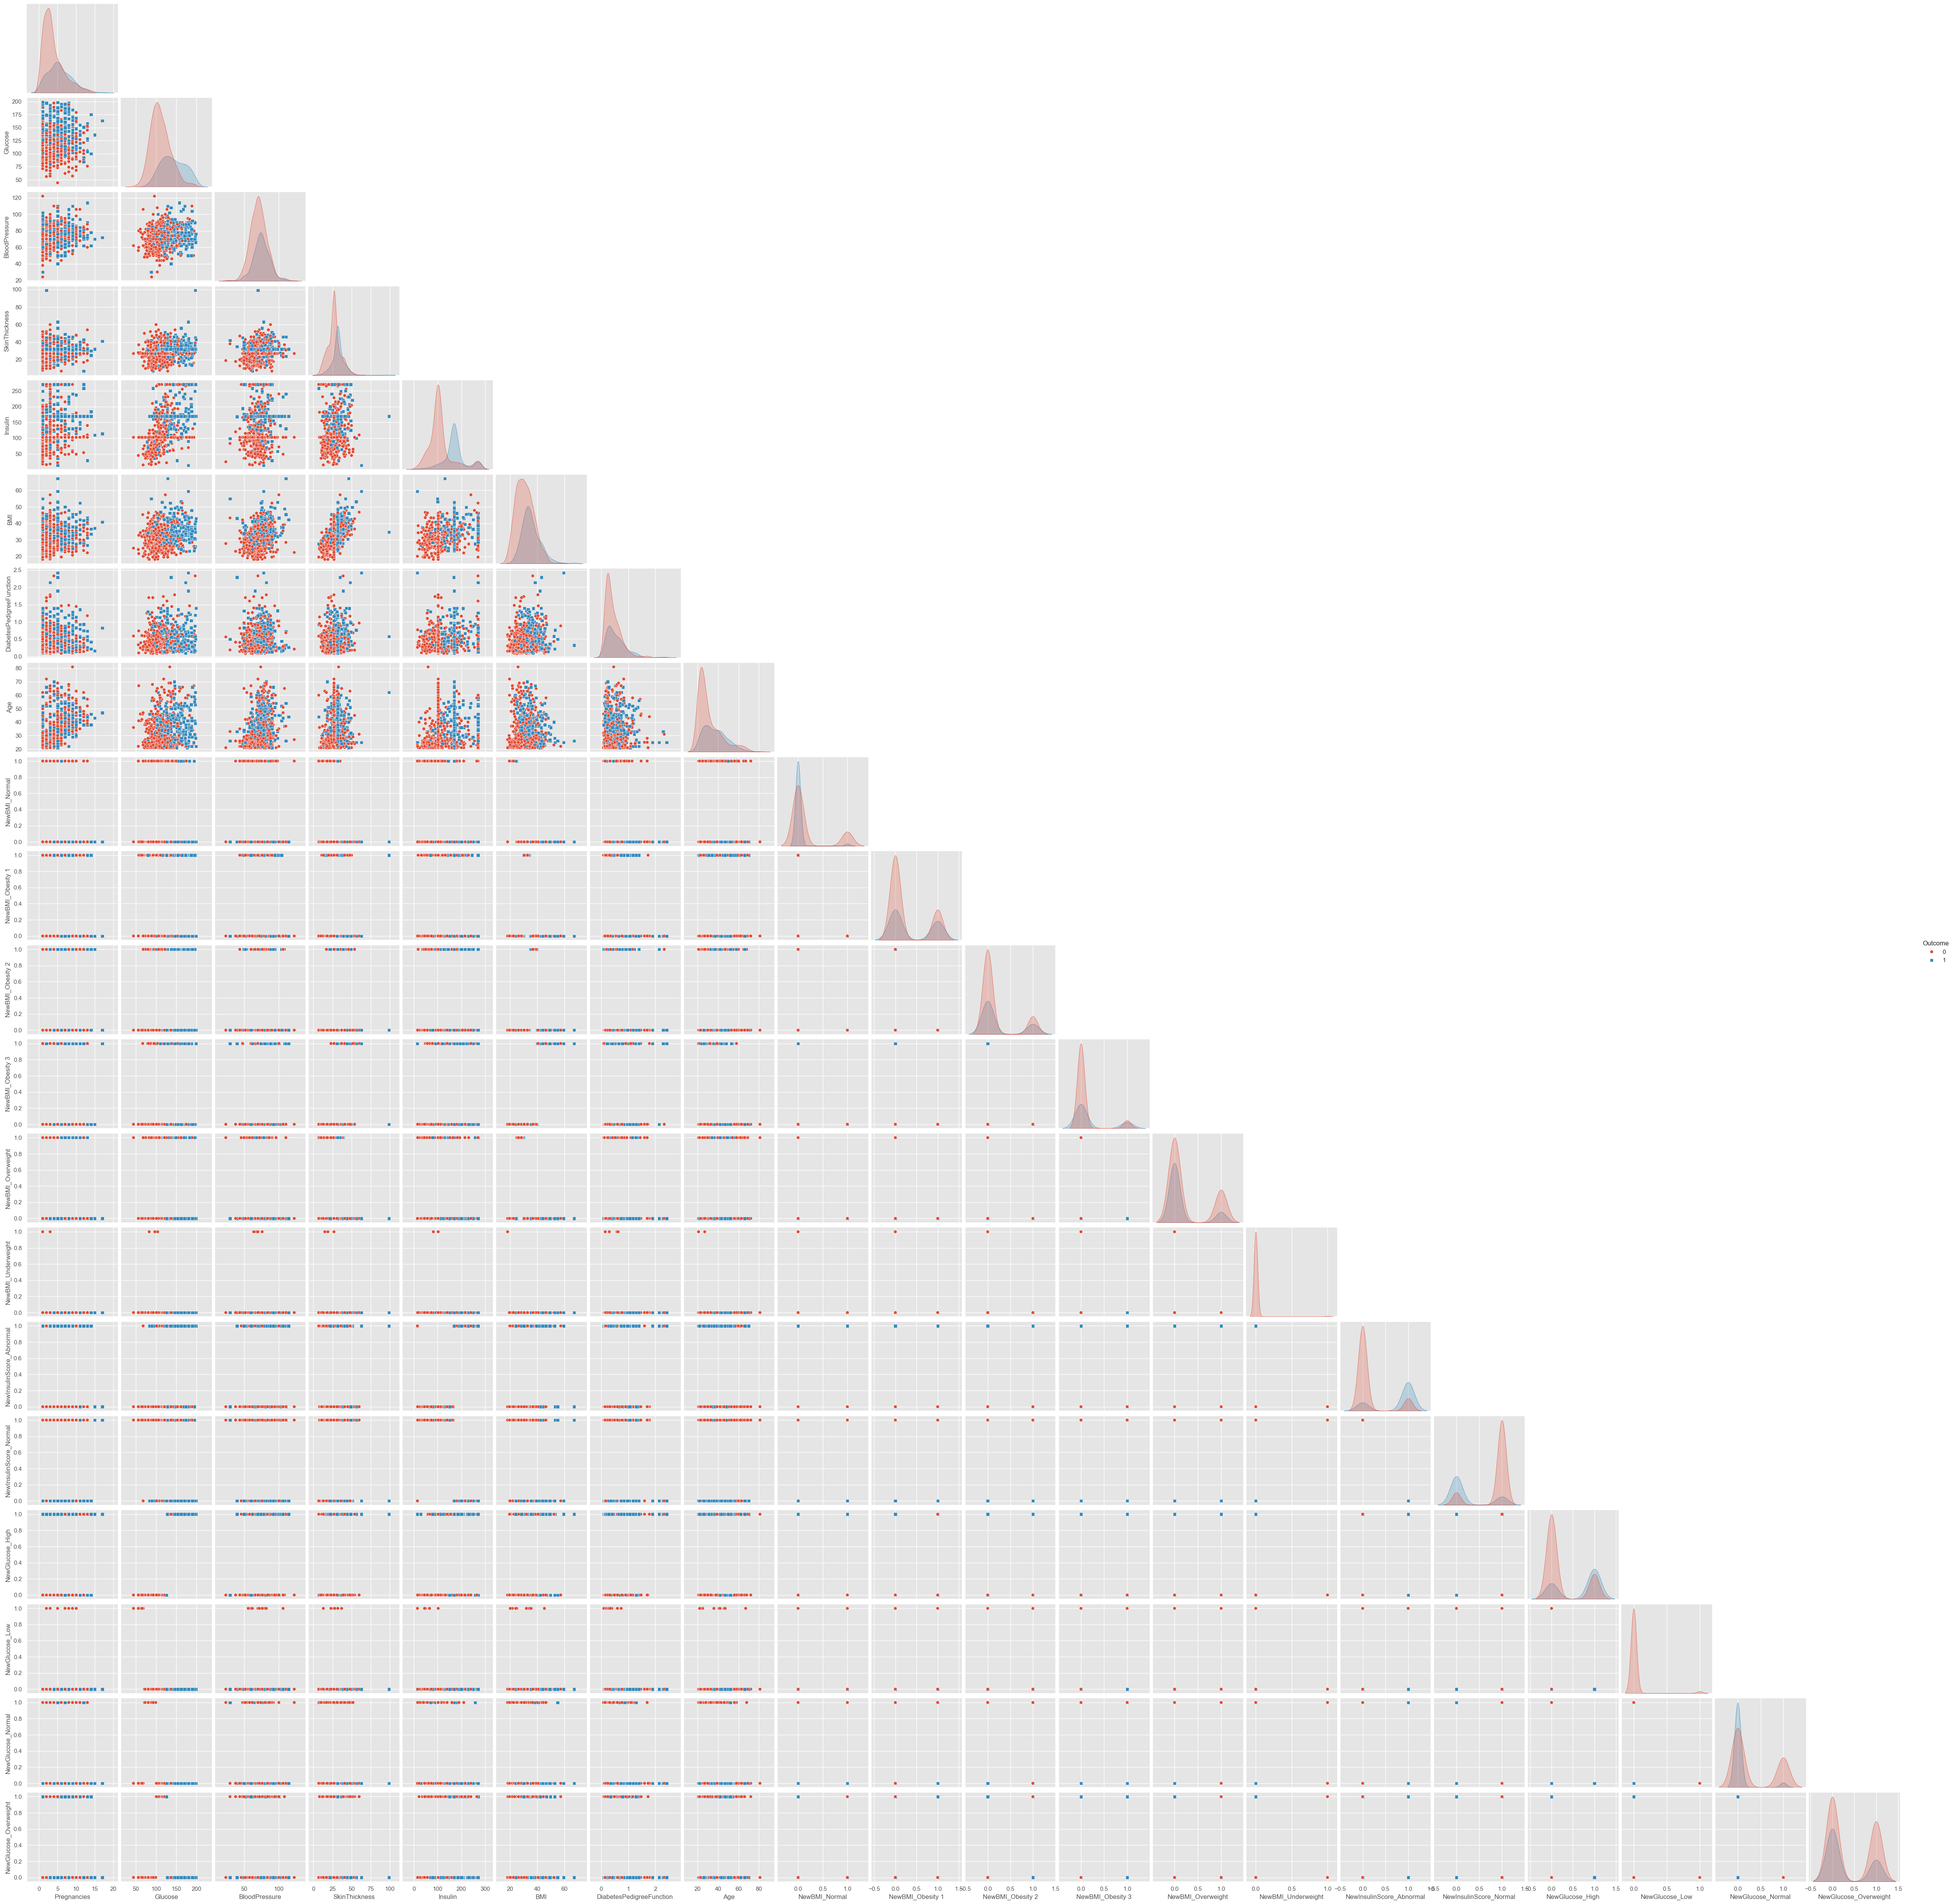

In [45]:
sns.pairplot(df, hue='Outcome', markers=['o', 's'], corner=True)

## Splitting data for classification

This code separates the feature matrix `X` and the target vector `y` from the DataFrame `df`, converting both into NumPy arrays for compatibility with machine learning algorithms that typically require array-like data structures.

In [46]:
X=df.drop('Outcome', axis=1).values
y=df['Outcome'].values

In [47]:
X

array([[6.0, 148.0, 72.0, ..., False, False, False],
       [1.0, 85.0, 66.0, ..., False, True, False],
       [8.0, 183.0, 64.0, ..., False, False, False],
       ...,
       [5.0, 121.0, 72.0, ..., False, False, True],
       [1.0, 126.0, 60.0, ..., False, False, True],
       [1.0, 93.0, 70.0, ..., False, True, False]], dtype=object)

In [48]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

This code splits the feature matrix `X` and target vector `y` into training and testing sets using a fixed random seed for reproducibility.

In [49]:
SEED=42

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=SEED)

This code applies standardization to the `X_train` and `X_test` datasets using `StandardScaler`, a common preprocessing step that scales features to have a mean of 0 and a standard deviation of 1. This helps improve model performance, especially for algorithms sensitive to feature scaling.

In [50]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Creation fo the Classification Model

### K-Nearest Neighbors

This section initializes a __k-nearest neighbors__ (__KNN__) classifier with specific parameters and then trains it on the `X_train` and `y_train` datasets. KNN is a simple, instance-based algorithm that classifies data points based on the labels of their closest neighbors.<br><br>
This code sets up and trains a k-nearest neighbors classifier with the following goals:
+ Instance-based Learning: KNN is a "lazy" learner, meaning it doesn’t learn an explicit model but instead uses the training data itself to make predictions by comparing new data points to stored instances.
+ Parameterization with Neighbors and Distance Metric: By setting `n_neighbors=5` and `p=2` (Euclidean distance), the code configures how the algorithm will measure distances and determine the most likely class of each new point based on the majority class of its nearest neighbors.

In [51]:
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

This code generates predictions using the trained `KNeighborsClassifier` on the test data (`X_test`), then combines and prints the predicted labels alongside the actual test labels (`y_test`). This allows for a side-by-side comparison of model predictions against true values.

In [52]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

#### Model Evaluation

##### Confusion Matrix
This code calculates and visualizes a confusion matrix for the model's predictions using a heatmap, which helps assess the performance of a classification model by showing the counts of true positives, false positives, true negatives, and false negatives.

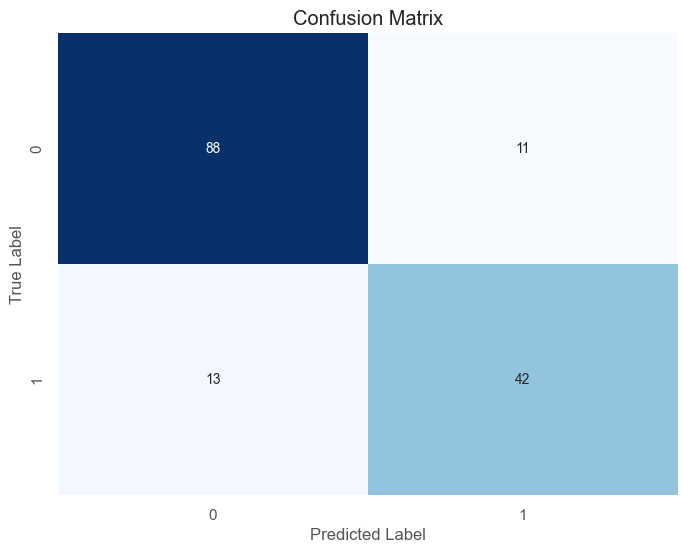

In [53]:
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

This code calculates and displays performance metrics for the model's predictions, providing an overall accuracy score as well as detailed classification metrics.

In [54]:
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        99
           1       0.79      0.76      0.78        55

    accuracy                           0.84       154
   macro avg       0.83      0.83      0.83       154
weighted avg       0.84      0.84      0.84       154



For Class 0 (non-diabetic):

+ Precision: 0.87, Recall: 0.89, F1-Score: 0.88

For Class 1 (diabetic):

+ Precision: 0.79, Recall: 0.76, F1-Score: 0.78

Overall Accuracy: 0.85

##### ROC Curve

This code generates and plots a Receiver Operating Characteristic (ROC) curve, which helps evaluate the performance of a binary classification model by showing the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) at various threshold settings.

__Purpose of the ROC Curve__

The ROC curve provides a graphical representation of the model’s diagnostic ability at various thresholds:

* Area Under the Curve (AUC): A commonly used metric associated with the ROC curve. An AUC close to 1 indicates excellent model performance, while an AUC of 0.5 indicates performance equivalent to random guessing.
* Interpretation: The ROC curve helps visualize the trade-off between sensitivity (True Positive Rate) and 1-specificity (False Positive Rate) as the decision threshold changes.
    + A model with high TPR and low FPR (curve close to the top left) is preferable, as it correctly identifies positives while minimizing false positives.


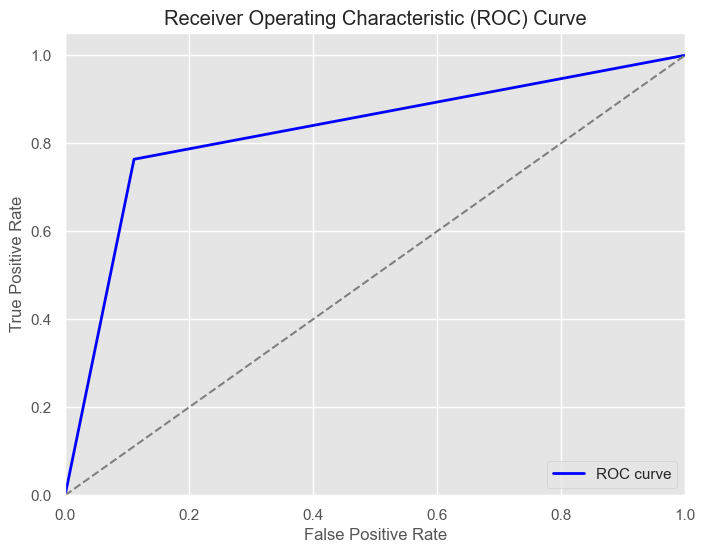

In [55]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

This code calculates the Area Under the Curve (AUC) score for the ROC curve and prints the result. The AUC score is a metric that quantifies the overall performance of a binary classification model.

In [56]:
auc_score=roc_auc_score(y_test, y_pred)
print(f'AUC Score: {np.round(auc_score, 5)}')

AUC Score: 0.82626


### Binary Neural Network Classifier

This code defines a neural network model using the Keras `Sequential` API. The model consists of multiple layers with progressively fewer neurons, culminating in an output layer designed for multi-class classification.

In [57]:
model=Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
num_classes=2
model.add(Dense(units=num_classes, activation='softmax'))


In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,986 (15.57 KB)

 Trainable params: 3,986 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

This code configures the neural network model for training by specifying the optimizer, loss function, and evaluation metrics.<br><br>
This code configures the model to:

+ __Optimize with Adam__: Provides efficient and adaptive learning, often resulting in faster convergence and better performance.
+ __Minimize Sparse Categorical Crossentropy Loss__: Suitable for binary classification with integer labels, this loss function encourages the model to improve its class predictions.
+ __Track Accuracy__: Allows for easy monitoring of the model’s performance during training.

With this configuration, the model is set up to learn effectively from the training data and provide interpretable metrics to evaluate its progress and final performance.

In [59]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

This code trains the neural network model using the training data, with specified parameters for epochs, batch size, and validation split. The training history is saved in `history`, allowing for later analysis of the model's learning progress over time.
This code configures and runs the training process, allowing the model to learn from the training data while providing validation feedback for each epoch. Key benefits include:

+ __Track Learning Progress__: By saving history, you can later visualize and analyze metrics like training and validation loss and accuracy, helping you assess how well the model is learning.
+ __Improve Generalization__: Using a validation split lets you see how well the model performs on data it hasn't seen before. This helps in detecting overfitting, where the model might perform well on training data but poorly on validation data.
+ __Efficient Updates with Mini-Batches__: The batch size of 32 balances memory efficiency and training stability.

In [60]:
history=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6571 - loss: 0.6073 - val_accuracy: 0.7317 - val_loss: 0.4809
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7951 - loss: 0.4217 - val_accuracy: 0.8618 - val_loss: 0.3645
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8392 - loss: 0.3658 - val_accuracy: 0.8699 - val_loss: 0.3114
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8362 - loss: 0.3554 - val_accuracy: 0.8862 - val_loss: 0.2896
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8821 - loss: 0.3079 - val_accuracy: 0.8943 - val_loss: 0.2842
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8929 - loss: 0.2868 - val_accuracy: 0.8862 - val_loss: 0.2823
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8879 - loss: 0.3007 - val_accuracy: 0.8862 - val_loss: 0.2833
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8975 - loss: 0.2793 - val_accuracy: 0.9024 - val_loss

This code evaluates the trained model on the test data, measuring its performance in terms of loss and accuracy. The results are then printed, with the accuracy formatted as a percentage.

In [61]:
test_loss, test_accuracy=model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {np.round(test_accuracy*100, 2)}%")

5/5 - 0s - 7ms/step - accuracy: 0.8182 - loss: 0.4483
Test Accuracy: 81.82%


This code retrieves and examines the maximum training and validation accuracy values recorded during the model’s training process. It helps assess the best performance achieved for both the training and validation sets.
+ __Maximum Training Accuracy__: Indicates the best performance the model achieved on the training data, which helps understand how well the model fits the training set.
+ __Maximum Validation Accuracy__: Reflects the highest accuracy on the validation data, showing how well the model generalizes to unseen data during training.


In [62]:
history_dict=history.history
max_train_accuracy=max(history_dict['accuracy'])
max_val_accuracy=max(history_dict['val_accuracy'])

print(f"Maximum Training Accuracy: {np.round(max_train_accuracy, 5)}")
print(f"Maximum Validation Accuracy: {np.round(max_val_accuracy, 5)}")

Maximum Training Accuracy: 0.93279
Maximum Validation Accuracy: 0.9187


This code generates class predictions for the test set and converts them into the final predicted class labels for each sample.

In [63]:
predictions=model.predict(X_test)
predicted_classes=np.argmax(predictions, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


#### Model Evaluation
##### Confusion Matrix
This code calculates and visualizes a confusion matrix for the model's predictions using a heatmap, which helps assess the performance of a classification model by showing the counts of true positives, false positives, true negatives, and false negatives.

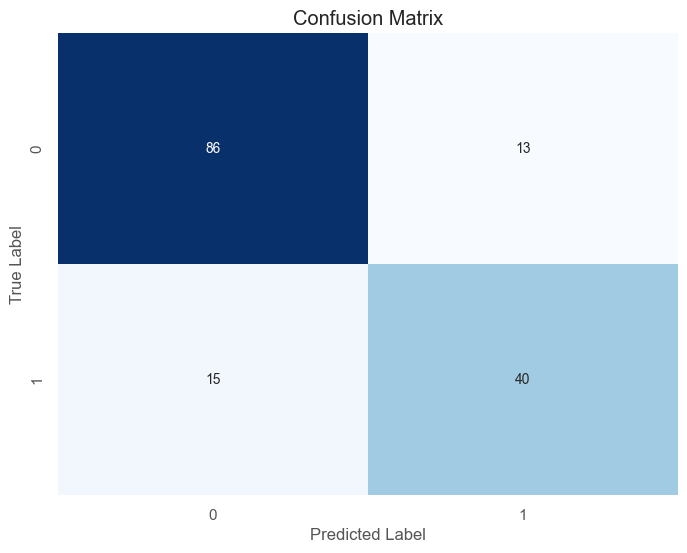

In [64]:
cm_test=confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

This code generates and prints a classification report that provides detailed evaluation metrics for each class in the binary classification model. These metrics include precision, recall, F1 score, and support, offering insights into the model's performance on each class separately.

In [65]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        99
           1       0.75      0.73      0.74        55

    accuracy                           0.82       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154



#### Accuracy Plot

This code generates a plot showing the training and validation accuracy over each epoch, with the last value of each accuracy line displayed directly on the graph.

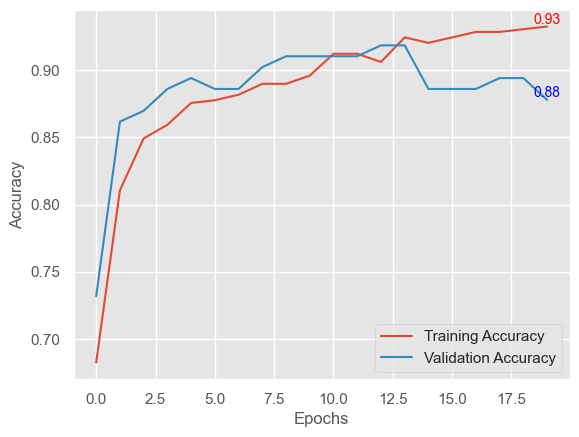

In [67]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# Display the last value of training accuracy
plt.text(len(history.history['accuracy'])-1, history.history['accuracy'][-1], f"{history.history['accuracy'][-1]:.2f}", ha='center', va='bottom', color='red')
#Display the last value of validation accuracy
plt.text(len(history.history['val_accuracy']) - 1, history.history['val_accuracy'][-1], f"{history.history['val_accuracy'][-1]:.2f}", ha='center', va='bottom', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Loss Plot
This code visualizes the training and validation loss over epochs while also highlighting the final loss values directly on the plot. 

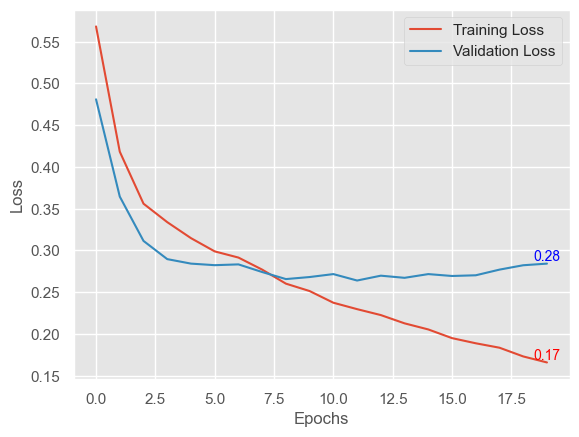

In [68]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
# Display the last value of training loss
plt.text(len(history.history['loss']) - 1, history.history['loss'][-1], f"{history.history['loss'][-1]:.2f}", ha='center', va='bottom', color='red')
# Display the last value of validation loss
plt.text(len(history.history['val_loss']) - 1, history.history['val_loss'][-1], f"{history.history['val_loss'][-1]:.2f}", ha='center', va='bottom', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Logistic Regression Model
This code initializes and trains a Logistic Regression model using the `LogisticRegression` class from the `sklearn.linear_model`. <br><br>
This code performs the following:
+ __Model Initialization__: It sets up the logistic regression model for binary classification.
+ __Training the Model__: The `fit` method trains the model on the provided training data, allowing it to learn from the input features (`X_train`) and their corresponding labels (`y_train`).

In [69]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

This code generates predictions using the trained logistic regression model and then combines the predicted labels with the actual labels from the test set for comparison.<br><br>
This code provides a way to evaluate the performance of the logistic regression model by:
+ __Comparing Predictions to True Labels__: The output allows for easy visual inspection of how many predictions were correct (when y_pred matches y_test) and how many were incorrect. This can help in diagnosing model performance.


In [70]:
y_pred=model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))

[[1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

#### Model Evaluation
##### Confusion Matrix
This code calculates and visualizes a confusion matrix for the model's predictions using a heatmap, which helps assess the performance of a classification model by showing the counts of true positives, false positives, true negatives, and false negatives.

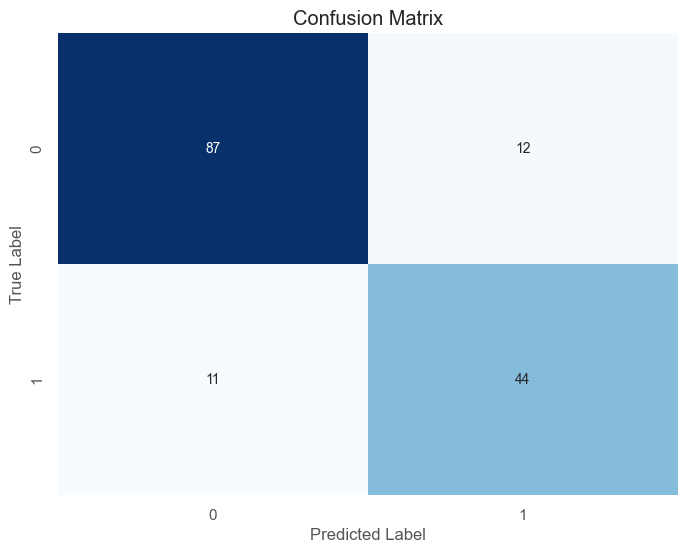

In [71]:
cm_lr=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

This code evaluates the performance of the logistic regression model on the test set by calculating the accuracy score and generating a detailed classification report.<br><br>
This code serves to:
+ __Assess Overall Performance__: The accuracy score provides a quick view of how many predictions were correct overall.
+ __Provide Detailed Insights__: The classification report gives deeper insights into the model's performance for each class, allowing for a better understanding of strengths and weaknesses, particularly important in imbalanced datasets.


In [72]:
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        99
           1       0.79      0.80      0.79        55

    accuracy                           0.85       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.85      0.85      0.85       154



## Conclusion

Throughout this project, we developed and evaluated three distinct models—K-Nearest Neighbors, Binary Neural Network Classifier, and Logistic Regression—to predict a binary outcome. Each model was assessed for its accuracy, confusion matrix metrics, precision, recall, F1-score, and AUC score. Below is a summary of the results for each model and recommendations for further improvement.

1. __K-Nearest Neighbors (KNN) Model__:
    + __Confusion Matrix Results__:
        * True Negatives (TN): 88
        * False Positives (FP): 11
        * False Negatives (FN): 13
        * True Positives (TP): 42
    + __Metrics__:
        * Class 0 (Non-Diabetic): 
            Precision = 0.87, Recall = 0.89, F1-Score = 0.88
        * Class 1 (Diabetic): 
            Precision = 0.79, Recall = 0.76, F1-Score = 0.78
        * Overall Accuracy: 0.85
        * AUC Score: 0.82626
    + __Interpretation__: The KNN model achieved a strong balance between sensitivity and specificity, with high accuracy and AUC score. Its performance for non-diabetic cases was particularly strong, and it maintained balanced precision and recall for the diabetic class, indicating solid generalization.

2. __Binary Neural Network Classifier__:
    + __Confusion Matrix Results__:
        * True Negatives (TN): 86
        * False Positives (FP): 13
        * False Negatives (FN): 15
        * True Positives (TP): 40
    + __Metrics__:
        * Test Accuracy: 0.8182
        * Test Loss: 0.4483
        * AUC Score: 0.82626
        * Maximum Training Accuracy: 0.93279
        * Maximum Validation Accuracy: 0.9187
        * Class 0 (Non-Diabetic): 
            Precision = 0.85, Recall = 0.87, F1-Score = 0.86
        * Class 1 (Diabetic): 
            Precision = 0.75, Recall = 0.73, F1-Score = 0.74
    + __Interpretation__: The neural network classifier showed high training and validation accuracy, suggesting effective learning. However, the test accuracy was slightly lower than the training and validation scores, indicating potential overfitting. While its performance is comparable to KNN, it has a slightly lower recall for the diabetic class, showing room for improvement in capturing true positives.

3. __Logistic Regression Model__:
    + __Confusion Matrix Results__:
        * True Negatives (TN): 87
        * False Positives (FP): 12
        * False Negatives (FN): 11
        * True Positives (TP): 44
    + __Metrics__:
        * Class 0 (Non-Diabetic): 
            Precision = 0.89, Recall = 0.88, F1-Score = 0.88
        * Class 1 (Diabetic): 
            Precision = 0.79, Recall = 0.80, F1-Score = 0.79
    + __Interpretation__: The logistic regression model provided a well-balanced accuracy with strong performance in classifying both diabetic and non-diabetic cases. The model’s interpretability and consistent performance make it a robust choice for binary classification tasks, though its linear decision boundaries may limit its predictive power compared to more complex models.

## Recommendations for Future Improvements

1. __Enhanced Feature Engineering__: Additional derived features or transformations could reveal more nuanced relationships in the data, potentially improving model performance across all algorithms.

2. __Model Optimization__:
    + __K-Nearest Neighbors__: Experimenting with different values of k and distance metrics may further enhance classification performance.
    + __Binary Neural Network Classifier__: Hyperparameter tuning (e.g., adjusting layer size, learning rate, batch size) can help reduce overfitting and potentially improve generalization.
    + __Logistic Regression__: Adding regularization terms (L1 or L2) could improve robustness by minimizing overfitting, especially if feature engineering introduces additional predictors.

3. __Cross-Validation__: Applying cross-validation techniques (such as k-fold cross-validation) can provide a more reliable measure of model performance and help verify that each model generalizes well across different subsets of the data.

4. __Ensemble Methods__: Combining the predictions of multiple models (such as logistic regression with KNN or the neural network) through ensemble methods could leverage the strengths of each model, enhancing predictive accuracy and robustness.

5. __Exploring Non-Linear Models__: Given that logistic regression is linear, testing additional non-linear models such as Support Vector Machines (SVMs) or Gradient Boosting could reveal patterns that the current models may not capture, particularly if non-linear relationships exist in the data.

In summary, each model demonstrates valuable strengths, with KNN showing robust overall accuracy, the neural network achieving high training and validation scores, and logistic regression providing a balanced and interpretable result. By implementing the recommendations above, the predictive performance and reliability of these models could be further enhanced, especially in scenarios requiring high sensitivity for positive cases.